### Methodology of the analysis of categorical variables
    
    The descriptive process of TelCO customers data has been analysed in terms of two main categories: Categorical information and numerical information. The first part of this notebook is going to introduce some relations between categories of each column and churn/loyal customers.

    Before presenting the results, it should be noted that three fundamental functions have been defined to conduct the analysis. 

    First function 'Percentage' is following an approach in a way that explains the percentage distribution of each category with respect to the corresponding column. For example, if the column is "Partner", the category "0" will present the percentage of "No" and category "1" will present the percentage of "Yes". There are three types of data for the first function: All Customers, Churning Customers, and Loyal Customers. By comparing the results, we may get some intuition about the differences between Churning and Loyal Customers. 

    Second function 'ChurnPer' presents the percentage distribution of churning customers with respect to each category. For example, if the column is "Partner", the category "0" will present the churning percentage of customers who are in the "No".

    Third function 'LoyPer' presents the percentage distribution of loyal customers with respect to each category. For example, if the column is "Partner", the category "0" will present the loyal percentage of customers who are in the "No".

    One thing that should be noted that the second and the third function are the complementary functions. When we add the results in the same column and same row, we will get 100%.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

########## FUNCTIONS ###########

### The Factor Percentage Distribution Function ###
def percentage(factorized_dat):
    
    # To obtain the columns that have "factor" inputs
    mask = ((factorized_dat == factorized_dat) | factorized_dat.isnull()) & (factorized_dat.dtypes == 'O')
    masked_data = factorized_dat[mask].dropna(axis=1)
    
    # To convert the string factor into numeric factor
    factor = masked_data.apply(lambda x: pd.factorize(x, sort = True)[0])
    
    # To create the factorized data
    column_list = factor.columns[1:len(factorized_dat.columns)]
    factorized_dat[column_list]=factor[column_list]

    # To find the percentages of factors with respect to each column
    val = pd.DataFrame(index = range(0,4),columns =column_list )
    for col in column_list:
        tmp = factorized_dat[col]
        stat=np.zeros(max(tmp)+1)
        for i in range(min(tmp),max(tmp)+1):
            stat[i] = len(tmp[tmp==i])/len(tmp)*100
        val[col] = pd.Series(stat)

    val = val.fillna(0).round(2)
    return val;

### Churning Percentage of Each Factor in the Columns ###
def ChurnPer(factorized_dat):
    # To obtain the columns that have "factor" inputs
    mask = ((factorized_dat == factorized_dat) | factorized_dat.isnull()) & (factorized_dat.dtypes == 'O')
    masked_data = factorized_dat[mask].dropna(axis=1)
    
    # To convert the string factor into numeric factor
    factor = masked_data.apply(lambda x: pd.factorize(x, sort = True)[0])
    
    # To convert string categories to the numeric factorized data
    column_list = factor.columns[1:len(factorized_dat.columns)]
    column_list = column_list[:-1]
    # To find the percentages of factors with respect to each column
    val = pd.DataFrame(index = range(0,4),columns =column_list )
    for col in column_list:
        column = [col,'Churn']
        tmp = factor[column]
        stat=np.zeros(max(tmp[col])+1)
        for i in range(min(tmp[col]),max(tmp[col])+1):
            stat[i] = len(tmp[(tmp[col]==i) & (tmp['Churn']==1)])/len(tmp[tmp[col]==i])*100
        val[col] = pd.Series(stat)
    val = val.fillna(0).round(2)
    return val;

### Loyal Percentage of Each Factor in the Columns ###
def LoyPer(factorized_dat):
    # To obtain the columns that have "factor" inputs
    mask = ((factorized_dat == factorized_dat) | factorized_dat.isnull()) & (factorized_dat.dtypes == 'O')
    masked_data = factorized_dat[mask].dropna(axis=1)
    
    # To convert the string factor into numeric factor
    factor = masked_data.apply(lambda x: pd.factorize(x, sort = True)[0])
    
    # To create the factorized data
    column_list = factor.columns[1:len(factorized_dat.columns)]
    column_list = column_list[:-1]
    # To find the percentages of factors with respect to each column
    val = pd.DataFrame(index = range(0,4),columns =column_list )
    for col in column_list:
        column = [col,'Churn']
        tmp = factor[column]
        stat=np.zeros(max(tmp[col])+1)
        for i in range(min(tmp[col]),max(tmp[col])+1):
            stat[i] = len(tmp[(tmp[col]==i) & (tmp['Churn']==0)])/len(tmp[tmp[col]==i])*100
        val[col] = pd.Series(stat)
    val = val.fillna(0).round(2)
    return val;

### The types of the values (categorical / numerical)
    The types of variables must be analysed in the first place. During the procedure, we notice that the python notebook             perceives Senior Citizen and Total Charges as "Numeric" and "Categorical"; therefore, their types are changed into                   "Categorical" and "Numerical".

In [2]:
# Dataframe preparation
dataframe = pd.read_csv("Telco-Customer-Churn.csv")
dataframe['SeniorCitizen'] = dataframe['SeniorCitizen'].astype('O')
dataframe['TotalCharges'] = pd.to_numeric(dataframe['TotalCharges'],errors = 'coerce')
dataframe['tenure'] = pd.to_numeric(dataframe['tenure'],errors = 'coerce')

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), o

### Legend to show the 'string names' of 0, 1, 2, 3 for each features (columns)
    As we carry out our first analysis based on factors such as (0-1-2-3), a legend must be created to define which factor symbolises which category with respect to columns. This legend would be the heart of percentage analysis and it should be used as a reference point to understand the further results.

In [3]:
factorized_dat = dataframe.copy()
mask = ((factorized_dat == factorized_dat) | factorized_dat.isnull()) & (factorized_dat.dtypes == 'O')
masked_data = factorized_dat[mask].dropna(axis=1)
# To create the factorized data
column_list = masked_data.columns[1:len(factorized_dat.columns)]
val = pd.DataFrame(index = range(0,4), columns = column_list )
for col in column_list:
    val[col] = pd.Series(masked_data[col].unique()).sort_values().reset_index(drop=True)
val = val.fillna(0)
val

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,No,No,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),No
1,Male,1,Yes,Yes,Yes,No phone service,Fiber optic,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),Yes
2,0,0,0,0,0,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Two year,0,Electronic check,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mailed check,0


In [4]:
# General Customers Data
general = dataframe.copy()

# Churning Customers Index
churning = dataframe[dataframe['Churn']=='Yes'].index
churning_percentage = dataframe.iloc[churning,:].drop(['TotalCharges','Churn'],axis=1)

# Loyal Customers Index
loyal = dataframe[dataframe['Churn']=='No'].index
loyal_percentage = dataframe.iloc[loyal,:].drop(['TotalCharges','Churn'],axis=1)


### Display The Distribution of Customers ### 
print("The Factor Distribution of General Customer Data")
# General Customer Distribution
display(percentage(general))

print("\n","The Factor Distribution of Churning Customer Data")
# Churning Customer Distribution
display(percentage(churning_percentage))

print("\n","The Factor Distribution of Loyal Customer Data")
# Loyal Customer Distribution
display(percentage(loyal_percentage))

The Factor Distribution of General Customer Data


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,49.52,83.79,51.7,70.04,9.68,48.13,34.37,49.67,43.84,43.94,49.31,39.90,39.54,55.02,40.78,21.92,73.46
1,50.48,16.21,48.3,29.96,90.32,9.68,43.96,21.67,21.67,21.67,21.67,21.67,21.67,20.91,59.22,21.61,26.54
2,0.00,0.00,0.0,0.00,0.00,42.18,21.67,28.67,34.49,34.39,29.02,38.44,38.79,24.07,0.00,33.58,0.00
3,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.89,0.00



 The Factor Distribution of Churning Customer Data


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,50.24,74.53,64.21,82.56,9.1,45.43,24.56,78.17,65.97,64.79,77.37,50.40,50.19,88.55,25.09,13.80
1,49.76,25.47,35.79,17.44,90.9,9.10,69.40,6.05,6.05,6.05,6.05,6.05,6.05,8.88,74.91,12.41
2,0.00,0.00,0.00,0.00,0.0,45.48,6.05,15.78,27.98,29.16,16.59,43.55,43.77,2.57,0.00,57.30
3,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.48



 The Factor Distribution of Loyal Customer Data


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,49.27,87.13,47.18,65.52,9.9,49.11,37.92,39.37,35.85,36.41,39.18,36.10,35.70,42.91,46.44,24.86
1,50.73,12.87,52.82,34.48,90.1,9.90,34.77,27.31,27.31,27.31,27.31,27.31,27.31,25.26,53.56,24.93
2,0.00,0.00,0.00,0.00,0.0,40.99,27.31,33.32,36.84,36.28,33.51,36.59,36.99,31.83,0.00,25.01
3,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.20


    One of the most important results will be presented below. We can easily define which types of customers tend to be churning or loyal.

In [5]:
print("The Churning Percentages of Each Factor in the Columns")
display(ChurnPer(dataframe))

print("\n","The Loyal Percentages of Each Factor in the Columns")
display(LoyPer(dataframe))

The Churning Percentages of Each Factor in the Columns


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,26.92,23.61,32.96,31.28,24.93,25.04,18.96,41.77,39.93,39.13,41.64,33.52,33.68,42.71,16.33,16.71
1,26.16,41.68,19.66,15.45,26.71,24.93,41.89,7.40,7.40,7.40,7.40,7.40,7.40,11.27,33.57,15.24
2,0.00,0.00,0.00,0.00,0.00,28.61,7.40,14.61,21.53,22.50,15.17,30.07,29.94,2.83,0.00,45.29
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.11



 The Loyal Percentages of Each Factor in the Columns


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,73.08,76.39,67.04,68.72,75.07,74.96,81.04,58.23,60.07,60.87,58.36,66.48,66.32,57.29,83.67,83.29
1,73.84,58.32,80.34,84.55,73.29,75.07,58.11,92.60,92.60,92.60,92.60,92.60,92.60,88.73,66.43,84.76
2,0.00,0.00,0.00,0.00,0.00,71.39,92.60,85.39,78.47,77.50,84.83,69.93,70.06,97.17,0.00,54.71
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,80.89


### Important features for churning customers
    To see which features (columns) are important to determine common properties of churning customers and loyal customers we created the following functions. This fucntions parse the dataframe for a specified percentage and take the columns which features above the benchmark.
    
    For example, we set the threshold as 40%. We get a new dataframe with values greater than 40%. When we observe the results we see that if the contract type of a customer is 'month-to-month' it is more likely (>40%) that this customer will be among churning customers.
    
    Below, we plot a bar chart which shows these features with high percentage of churning customers. The corresponding values 0, 1, 2, 3 can be seen above in the table called val as legend for values.

The Customer Categories that have high churning percentages


{'SeniorCitizen': 1,
 'InternetService': 'Fiber optic',
 'OnlineSecurity': 'No',
 'TechSupport': 'No',
 'Contract': 'Month-to-month',
 'PaymentMethod': 'Electronic check'}

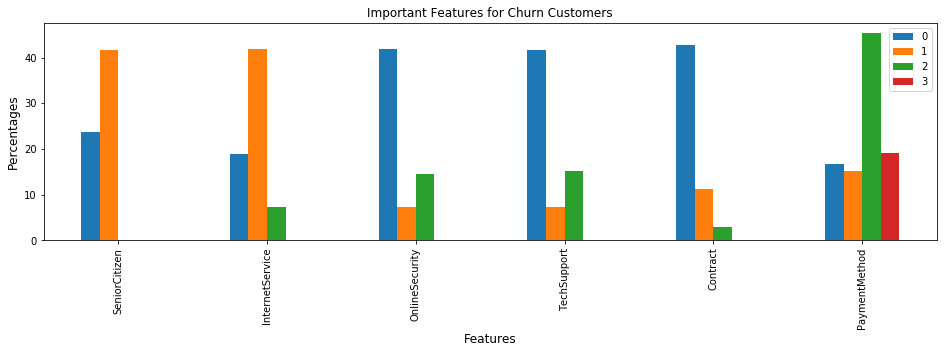

In [6]:
df = ChurnPer(dataframe)
df2 = df[df>40]

importantFeatures2 = {}

for col in df2.columns:
    tempor = df2.notna()
    if bool(tempor.index[tempor[col]].tolist()) == True:
        importantFeatures2[col] = val.iloc[tempor.index[tempor[col]].tolist()[0]][df.columns.get_loc(col)]

counter = 0;
a = []
for col in df.columns:
    for coll in importantFeatures2.keys():
        if col == coll:
            a.append(counter)
    counter += 1
        #a = [1, 5]
dftodisplay = df.iloc[0:4, a]
ax = dftodisplay.T.plot.bar(title='Important Features for Churn Customers', legend=True, figsize=(16,4))
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentages', fontsize=12)

print("The Customer Categories that have high churning percentages")
display(importantFeatures2)

### Important features for loyal customers
    Again to see which features (columns) are important to determine common properties of loyal customers we created this second functions. This fucntion parses the dataframe for a specified percentage and take the columns which features above the benchmark.
    
    For example, we set the threshold as 90%. We get a new dataframe with values greater than 90%. When we observe the results we see that if the contract type of a customer is '2 years' it is more likely (>90%) that this customer will be among loyal customers.
    
    Below, we plot a bar chart which shows these features with high percentage of loyal customers. The corresponding values 0, 1, 2, 3 can be seen above in the table called val as legend for values.

The Customer Categories that have high loyal percentages


{'InternetService': 'No',
 'OnlineSecurity': 'No internet service',
 'OnlineBackup': 'No internet service',
 'DeviceProtection': 'No internet service',
 'TechSupport': 'No internet service',
 'StreamingTV': 'No internet service',
 'StreamingMovies': 'No internet service',
 'Contract': 'Two year'}

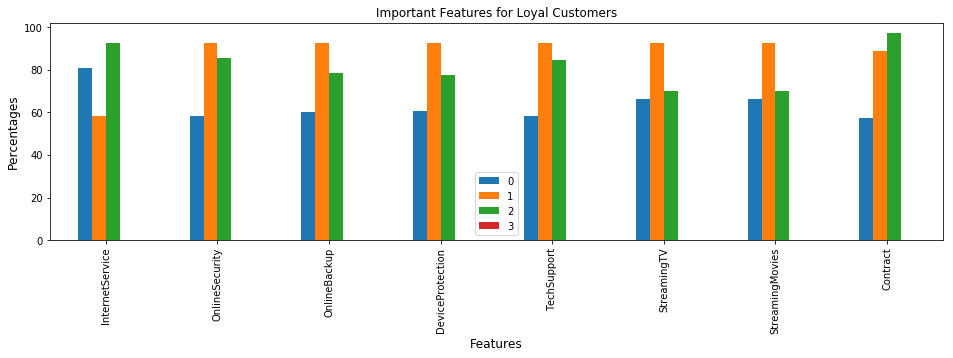

In [7]:
df = LoyPer(dataframe)
df1 = df[df>90]

importantFeatures = {}

for col in df1.columns:
    tempor = df1.notna()
    if bool(tempor.index[tempor[col]].tolist()) == True:
        importantFeatures[col] = val.iloc[tempor.index[tempor[col]].tolist()[0]][df.columns.get_loc(col)]
counter = 0;
a = []
for col in df.columns:
    for coll in importantFeatures.keys():
        if col == coll:
            a.append(counter)
    counter += 1
        #a = [1, 5]
dftodisplay = df.iloc[0:4, a]
ax = dftodisplay.T.plot.bar(title='Important Features for Loyal Customers', legend=True, figsize=(16,4))
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentages', fontsize=12)
print("The Customer Categories that have high loyal percentages")
display(importantFeatures)